<a href="https://colab.research.google.com/github/mathewsrc/Natural-Language-Processing-in-Python/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

**The goal of sentiment analysis is to automatically classify the sentiment of a text as positive, negative, or neutral, or to assign sentiment scores to indicate the intensity or polarity of the sentiment.**

**Applications**

- Social media monitoring
- Brand monitoring
- Marketing Analytics
- Product Analytics

In [13]:
%%capture
!pip install datasets #Hugging Face datasets
!pip install polars

In [15]:
import polars as pl

In [7]:
from datasets import load_dataset

# Load dataset from Hugging Face
reviews = load_dataset("rotten_tomatoes")

# Print column names
reviews.column_names

  0%|          | 0/3 [00:00<?, ?it/s]

{'train': ['text', 'label'],
 'validation': ['text', 'label'],
 'test': ['text', 'label']}

In [18]:
# Get training data
training = reviews["train"]

# Convert Dataset to Pandas
training = training.to_pandas()
training_pl = pl.from_pandas(training)
training_pl.head()

text,label
str,i64
"""the rock is de…",1
"""the gorgeously…",1
"""effective but …",1
"""if you sometim…",1
"""emerges as som…",1


Couting the number of negative and positive reviews and their proportion

In [27]:
%%time
print('Number of positive and negative reviews: ', training.label.value_counts())
print('Proportion of positive and negative reviews: ', training.label.value_counts() / len(training))

Number of positive and negative reviews:  1    4265
0    4265
Name: label, dtype: int64
Proportion of positive and negative reviews:  1    0.5
0    0.5
Name: label, dtype: float64
CPU times: user 8.26 ms, sys: 136 µs, total: 8.39 ms
Wall time: 10.2 ms


In [28]:
%%time
print('Number of positive and negative reviews: ', training_pl['label'].value_counts())
print('Proportion of positive and negative reviews: ', training_pl['label'].value_counts() / len(training_pl))

Number of positive and negative reviews:  shape: (2, 2)
┌───────┬────────┐
│ label ┆ counts │
│ ---   ┆ ---    │
│ i64   ┆ u32    │
╞═══════╪════════╡
│ 0     ┆ 4265   │
│ 1     ┆ 4265   │
└───────┴────────┘
Proportion of positive and negative reviews:  shape: (2, 2)
┌──────────┬────────┐
│ label    ┆ counts │
│ ---      ┆ ---    │
│ f64      ┆ f64    │
╞══════════╪════════╡
│ 0.0      ┆ 0.5    │
│ 0.000117 ┆ 0.5    │
└──────────┴────────┘
CPU times: user 4.22 ms, sys: 1.93 ms, total: 6.16 ms
Wall time: 5.69 ms


Longest and shortest reviews

In [48]:
%%time
length_reviews = training.text.str.len()
print(max(length_reviews))
print(min(length_reviews))

267
4
CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 13.3 ms


In [46]:
%%time
length_reviews = training_pl['text'].str.lengths() # or n_chars()
print(max(length_reviews))
print(min(length_reviews))

267
4
CPU times: user 27.4 ms, sys: 676 µs, total: 28.1 ms
Wall time: 28.9 ms


## Types of Sentiment Analysis algorithms

- Rule/lexicon-based
  Contains a list of predefined words and score
  nice +2, good +1, terrible -3
  - To get the total valence we sum the words in a setence

- Automatic/ Machine Learning
  - Rely on having labelled historical data

In [56]:
text = """In a bustling city, there was a promising young musician named
 Alex. He dedicated his life to his passion for music, pouring his heart
 and soul into every note he played. Alex dreamt of sharing his melodies
 with the world, but his dreams were shattered when he lost his hearing
 in a tragic accident. Devastated, he spiraled into a deep sadness and
 isolated himself from the world he once loved. Unable to communicate
 through music, Alex felt a profound sense of loss and loneliness.
 However, with the support of a few close friends, he slowly began
 to rediscover his purpose. Through sign language and visual
 expressions, Alex found a new way to connect with others and express
 his emotions. Although his journey was filled with pain, he became
 an inspiration to many, teaching them the importance of resilience
 and the ability to
 find beauty in the midst of sorrow.
"""

In [58]:
from textblob import TextBlob

# Happy history
blob = TextBlob(text)
print("Sentiment: ", blob.sentiment)

Sentiment:  Sentiment(polarity=0.028438228438228432, subjectivity=0.5157342657342657)


## **Word Cloud**

Pros

- Can reveal the essential
- Provide an overall sense of the text
- Easy to grasp and engaging

Cons

- Sometimes confusing


In [59]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

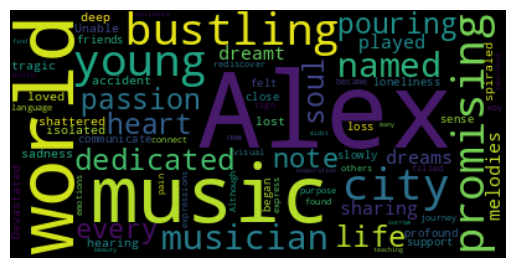

In [74]:
cloud_text = WordCloud(colormap="viridis").generate(text)
plt.imshow(cloud_text, interpolation="bilinear")
plt.axis("off")
plt.show()